**Team Id: PNT2022TMID03384**            
## Visualizing and Predicting Heart Diseases with an Interactive Dashboard                    
                                          Heart Disease Prediction using Machine Learning Approach

Heart disease is a general term that includes many types of heart problems. It's also called cardiovascular disease, which means heart and blood vessel disease.

Heart disease is the leading cause of death in the United States, but there are ways to prevent and manage many types of heart disease when caught early.

Dataset used: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

About Dataset:



1.   Age: in years
2.   Sex: 1 = male; 0 = female
3.   Chest pain type:

      Value 1: typical angina

      Value 2: atypical angina

      Value 3: non-anginal pain

      Value 4: asymptomatic
4.   BP:   resting blood pressure (in mm Hg on admission to the hospital)
5.   Cholesterol : serum cholestoral in mg/dl
6.   FBS: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7.   EKG results: resting electrocardiographic results

      Value 0: normal

      Value 1: aving ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

      Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8.   MAx HR: maximum heart rate achieved
9.   Excercise angina: exercise induced angina (1 = yes; 0 = no)
10.  Slope of ST: oldpeak = ST depression induced by exercise relative to rest
11.  Number of vessels fluro: number of major vessels (0-3) colored by flourosopy
12.  Thallium: 3 = normal; 6 = fixed defect; 7 = reversable defect

***Data Loading***

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.columns.values

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'], dtype=object)

In [ ]:
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

> # Initial Data Exploration

Age

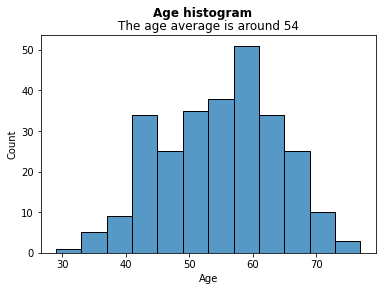

In [ ]:
plt.suptitle('Age histogram', fontweight='heavy')
plt.title('The age average is around 54')
sns.histplot(data=df, x='Age')
plt.show()

Sex

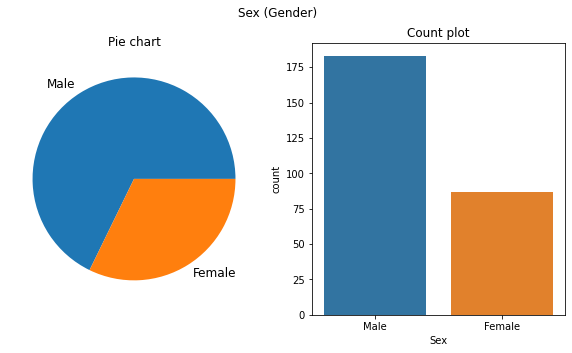

1    183
0     87
Name: Sex, dtype: int64
It can be noticed that predictor (Gender) is imbalance


In [ ]:
labels = ['Male', 'Female']
order = df['Sex'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Sex (Gender)")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Sex'].value_counts(), labels=labels, textprops={'fontsize':12})

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Sex', data=df, order=order)
plt.xticks([0, 1], labels)

plt.show()

print(df['Sex'].value_counts())
print("It can be noticed that predictor (Gender) is imbalance")

Chest pain type

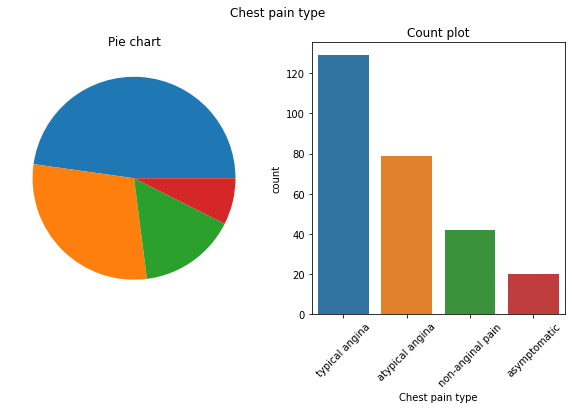

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [ ]:
labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
order = df['Chest pain type'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Chest pain type")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Chest pain type'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Chest pain type', data=df, order=order)
plt.xticks([0,1,2,3], labels, rotation=45)

plt.show()

df['Chest pain type'].value_counts()

Resting blood pressure - The average resting heart rate is 131.34. It can be observed that histogram is skewed to right side

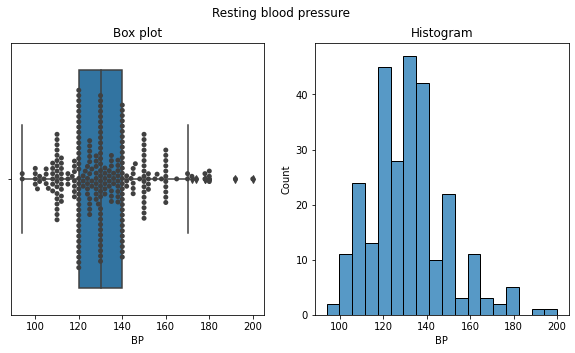

The average resting heart rate: 131.34 It can be observed that histogram is skewed to right side


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Resting blood pressure")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="BP", data=df)
sns.swarmplot(x="BP", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='BP', data=df)
plt.show()

print("The average resting heart rate: %2.2f It can be observed that histogram is skewed to right side" % (df["BP"].mean()))

Cholesterol - histogram resemble a normal distribution

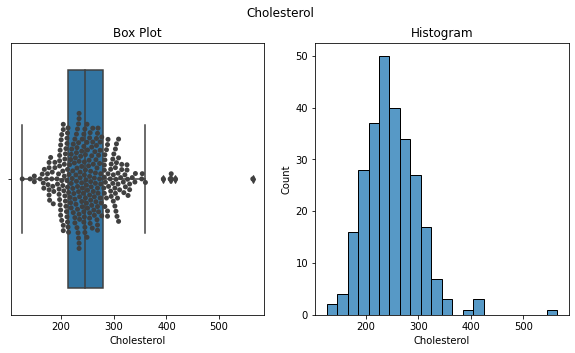

The average resting heart rate: 249.66. The shape of histogram resamble a normal distribution


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Cholesterol")

plt.subplot(1,2,1)
plt.title('Box Plot')
sns.boxplot(x="Cholesterol", data=df)
sns.swarmplot(x="Cholesterol", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Cholesterol', data=df)
plt.show()

print("The average resting heart rate: %2.2f. The shape of histogram resamble a normal distribution" % (df["Cholesterol"].mean()))

FBS over 120

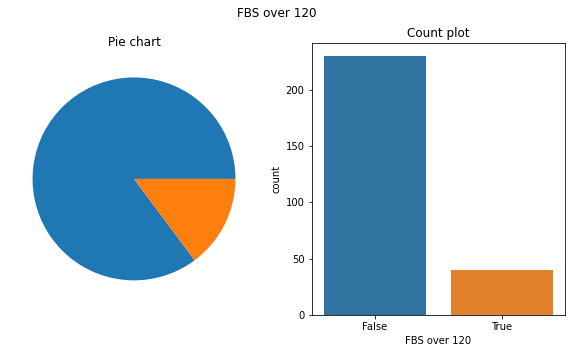

0    230
1     40
Name: FBS over 120, dtype: int64

In [ ]:
labels = ["False", 'True']
order = df['FBS over 120'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("FBS over 120")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['FBS over 120'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='FBS over 120', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.show()

df['FBS over 120'].value_counts()

EKG results

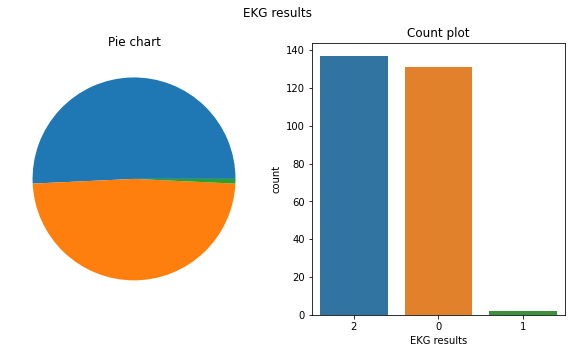

2    137
0    131
1      2
Name: EKG results, dtype: int64

In [ ]:
labels = ["normal", 'aving ST-T wave abnormality', "showing probable or definite left ventricular hypertrophy by Estes' criteria"]
order = df['EKG results'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("EKG results")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['EKG results'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='EKG results', data=df, order=order)
#plt.xticks([0,1,2], labels=labels, rotation=45)

plt.show()

df['EKG results'].value_counts()

Max HR - histogram is slightly left skewed

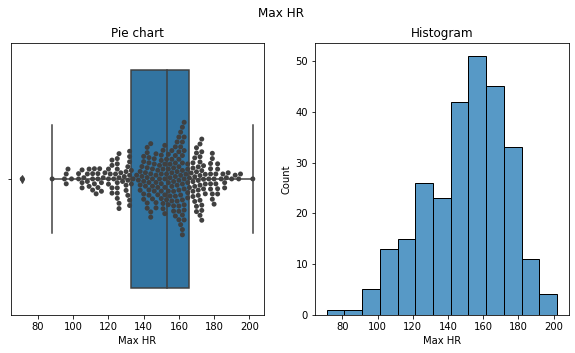

The max heart rate: 149.68 The histogram is slightly left skewed


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Max HR")

plt.subplot(1,2,1)
plt.title('Pie chart')
sns.boxplot(x="Max HR", data=df)
sns.swarmplot(x="Max HR", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Max HR', data=df)
plt.show()

print("The max heart rate: %2.2f The histogram is slightly left skewed" % (df["Max HR"].mean()))

Exercise angina	

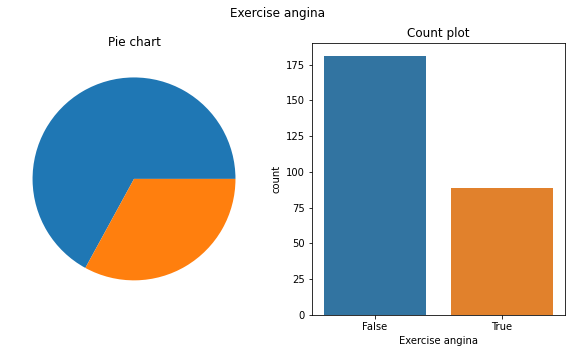

0    181
1     89
Name: Exercise angina, dtype: int64

In [ ]:
labels = ["False", 'True']
order = df['Exercise angina'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Exercise angina")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Exercise angina'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Exercise angina', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.show()

df['Exercise angina'].value_counts()

ST depression - histogram is left skewed. People are rather healthy

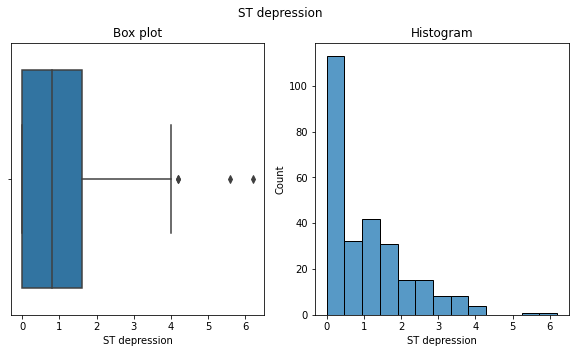

The ST depression average: 1.05 The histogram is left skewed


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("ST depression")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="ST depression", data=df)

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='ST depression', data=df)
plt.show()

print("The ST depression average: %2.2f The histogram is left skewed" % (df["ST depression"].mean()))

Slope of ST

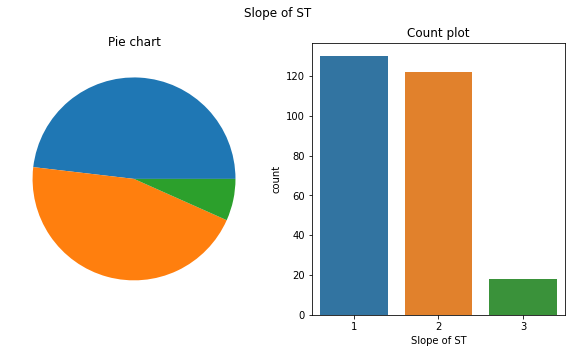

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

In [ ]:
labels = ["1", '2', '3']
order = df['Slope of ST'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Slope of ST")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Slope of ST'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Slope of ST', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()

df['Slope of ST'].value_counts()

Number of vessels fluro

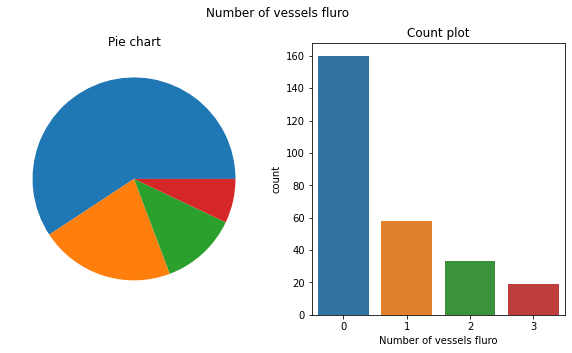

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [ ]:
labels = ["0", '1', '2', "3"]
order = df['Number of vessels fluro'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Number of vessels fluro")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Number of vessels fluro'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Number of vessels fluro', data=df, order=order)
plt.xticks([0,1,2,3], labels=labels)

plt.show()

df['Number of vessels fluro'].value_counts()

Thallium

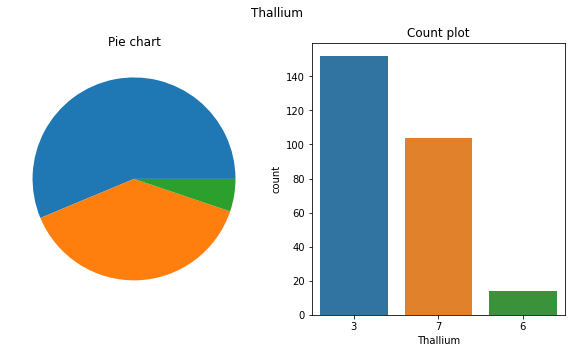

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [ ]:
labels = ["3", '7', '6']
order = df['Thallium'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Thallium")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Thallium'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Thallium', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()

df['Thallium'].value_counts()

> # EDA - Esploratory Data Analysis

Converting object targets to boolean

In [ ]:
target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

Correlation matrix - The 'Slope of ST' is highly linearly correlated with 'ST depression'

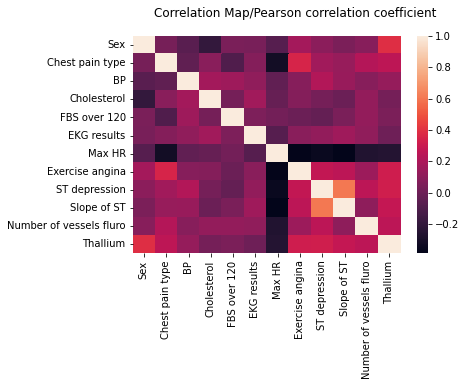

In [ ]:
plt.suptitle("Correlation Map/Pearson correlation coefficient")
sns.heatmap(df.iloc[:,1:-1].corr())

plt.show()

***Age Analysis***

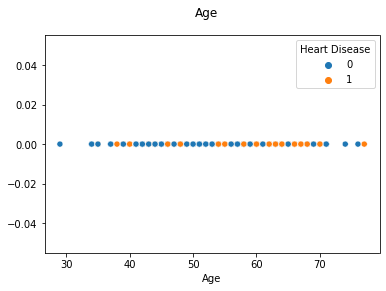

In [ ]:
plt.suptitle("Age")
sns.scatterplot(data=df, x='Age', y=np.zeros(len(df['Age'])), hue=target)
plt.show()

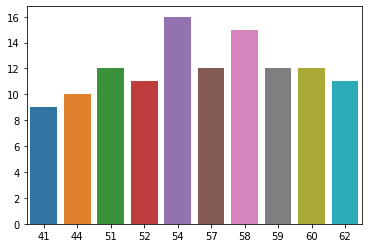

In [ ]:
data=df
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.show()

In [ ]:
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43333333333333


Dividing the Age feature into three parts - "Young", "Middle" and "Elder"

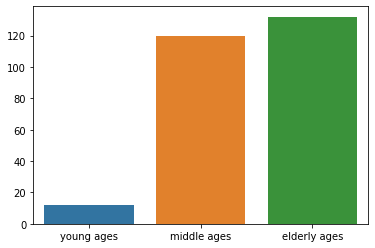

In [ ]:
Young = data[(data.Age>=29)&(data.Age<40)]
Middle = data[(data.Age>=40)&(data.Age<55)]
Elder = data[(data.Age>55)]


sns.set_context(font_scale = 1)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.show()

A large proportion of dataset contains Elder people.

Elderly people are more likely to suffer from heart disease.

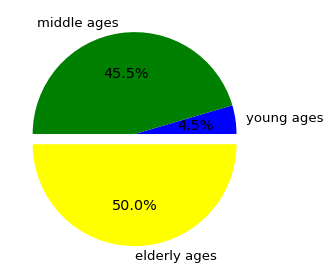

In [ ]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]

sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

***Sex Feature Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


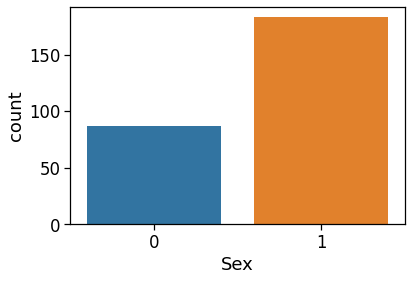

In [ ]:
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['Sex'])
plt.show()

Ratio of Male to Female is approx 2:1

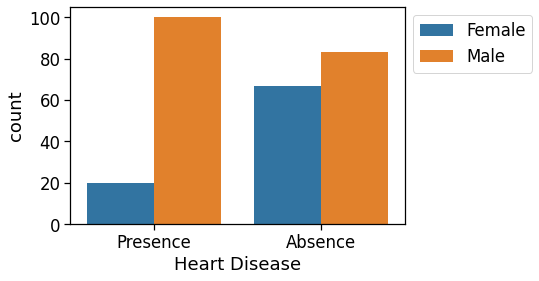

In [ ]:
ax = sns.countplot(x='Heart Disease', hue='Sex', data=df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], bbox_to_anchor=(1,1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


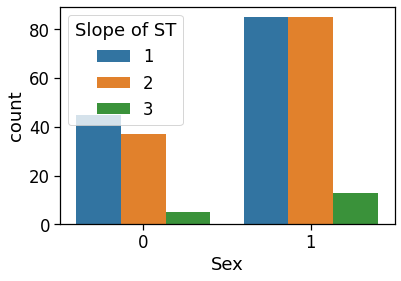

In [ ]:
sns.countplot(data['Sex'],hue=data["Slope of ST"])
plt.show()

***Chest Pain Type Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


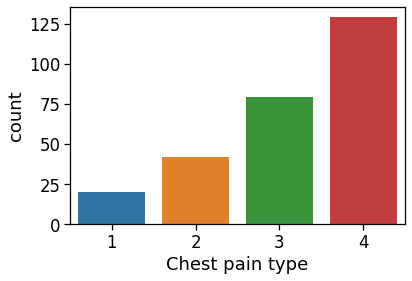

In [ ]:
sns.countplot(data['Chest pain type'])
plt.show()

Heart disease based on Chest pain type - 4th type of chest pain dominate in heart disease

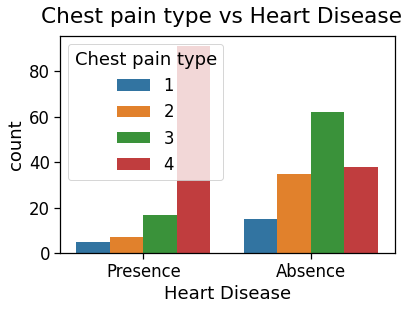

In [ ]:
plt.suptitle('Chest pain type vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Chest pain type')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


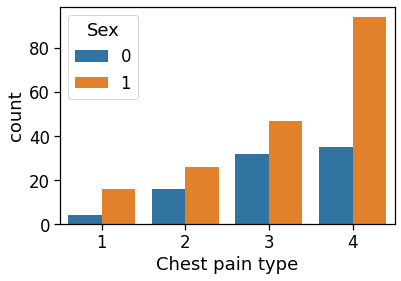

In [ ]:
sns.countplot(data['Chest pain type'],hue=data["Sex"])
plt.show()



*   People having least chest pain are not likely to heart disease.
*   People having severe chest pain are likely to heart disease



***Heart Disease based on BP*** - Persons with high BP have more chance to get heart disease

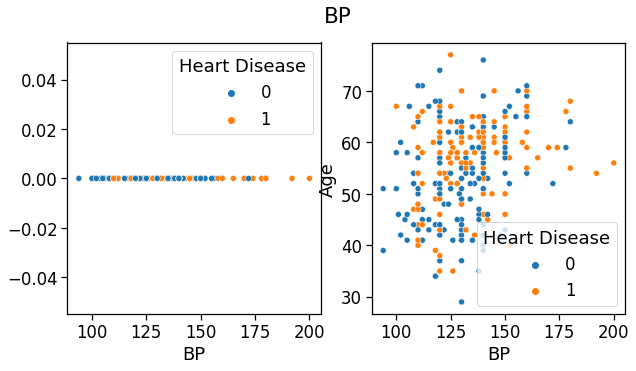

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("BP")
sns.scatterplot(data=df, x='BP', y=np.zeros(len(df['BP'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='BP', y='Age', hue=target)


plt.show()

***Cholesterol*** - Higer Cholesterol does not influence on heart disease

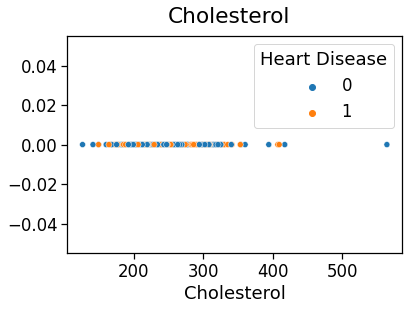

In [ ]:
plt.suptitle("Cholesterol")
sns.scatterplot(data=df, x='Cholesterol', y=np.zeros(len(df['Cholesterol'])), hue=target)
plt.show()

***FBS over 120*** - Also increased FBS over 120 does not imply on heart disease prediction

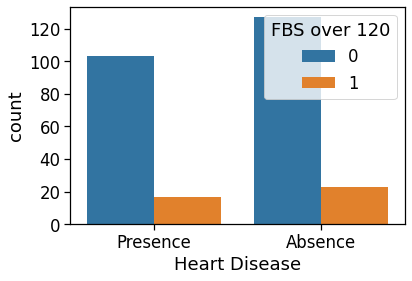

In [ ]:
ax = sns.countplot(x='Heart Disease', hue='FBS over 120', data=df)
sns.set_context('notebook',font_scale = 0.5)
plt.show()

***EKG results*** - The 2nd value of EKG could influence on heart disease prediction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


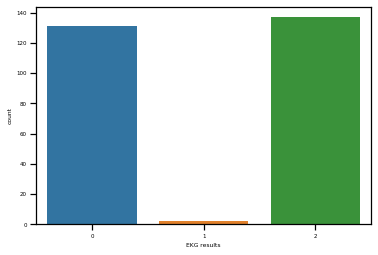

In [ ]:
sns.countplot(data['EKG results'])
plt.show()

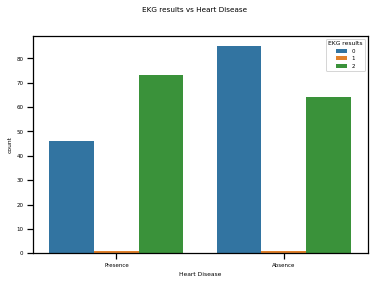

In [ ]:
plt.suptitle('EKG results vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='EKG results')
plt.show()

***Max HR*** - From the below graph we can observe that people with lower HR max have a higher likelihood of heart disease than those with higher HR max. Furthermore, we can observe explicit cut of/threshold where below 120 HR max objects have a higher probability to have problem with heart.

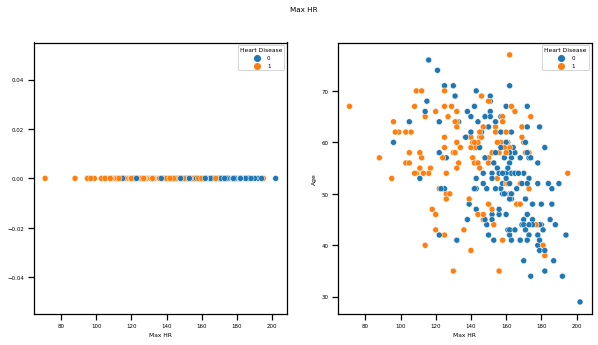

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("Max HR")
sns.scatterplot(data=df, x='Max HR', y=np.zeros(len(df['Max HR'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Max HR', y='Age', hue=target)

plt.show()

***Excercise angina*** - Chest pain after a high excercise intensity or stress can casues a presence of heart failure

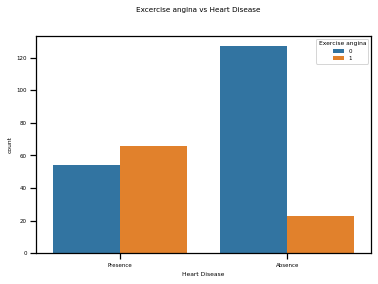

In [ ]:
plt.suptitle('Excercise angina vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Exercise angina')
plt.show()

***ST depression*** - Increased ST deprsesion increase heart disease. Nevetheless it can be observe on the bottom figure that males have higher probability of having depression.

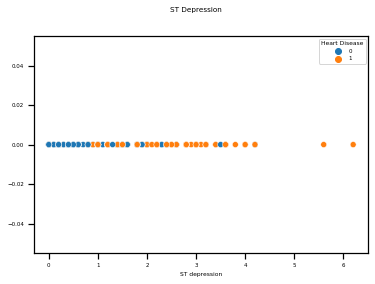

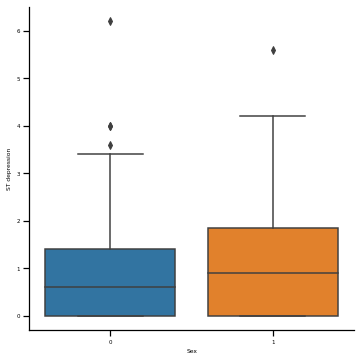

In [ ]:
plt.suptitle("ST Depression")
sns.scatterplot(data=df, x='ST depression', y=np.zeros(len(df['ST depression'])), hue=target)


ax = sns.catplot(x='Sex', y='ST depression', kind='box',  data = df)
plt.show()

***Slope of ST***

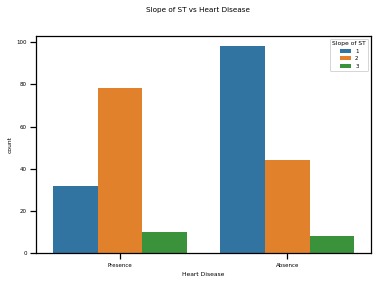

In [ ]:
plt.suptitle('Slope of ST vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Slope of ST')
sns.set_context(font_scale = 1)
plt.show()

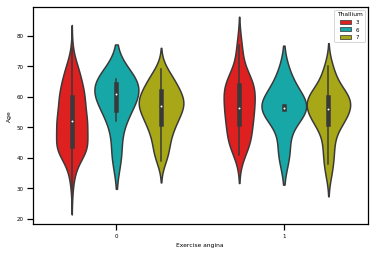

In [ ]:
sns.violinplot(x="Exercise angina",y="Age",data=data,palette=["r", "c", "y"],hue="Thallium")
plt.show()

People with fixed defect are more likely to have heart disease.

**Dummies variable**

In [ ]:
Chest_pain_type = pd.get_dummies(df['Chest pain type'], prefix='Chest pain type', drop_first=True)
EKG_results = pd.get_dummies(df['EKG results'], prefix='EKG results', drop_first=True)
Number_of_vessels_fluro = pd.get_dummies(df['Number of vessels fluro'], prefix='Number of vessels fluro', drop_first=True)
Thallium = pd.get_dummies(df['Thallium'], prefix='Thallium', drop_first=True)

frames = [df, Chest_pain_type, EKG_results, Number_of_vessels_fluro, Thallium]
df = pd.concat(frames, axis=1)

df.drop(columns = ['Chest pain type', 'EKG results', 'Number of vessels fluro', 'Thallium', 'Slope of ST'])

target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


**Balancing the dataset with standarization**

In [ ]:
one_target = int(np.sum(target))
zero_counter = 0
indices_to_remove = []

for i in range(target.shape[0]):
  if target[i] == 0:
    zero_counter += 1
    if zero_counter > one_target:
      indices_to_remove.append(i)

print("Indices before balancing data:", target.shape[0])
print("Idices to delete:", len(indices_to_remove))

Indices before balancing data: 270
Idices to delete: 30


In [ ]:
balanced_inputs = inputs.drop(indices_to_remove, axis=0)
balanced_targets = target.drop(indices_to_remove, axis=0)

#reset indices
reset_inputs = balanced_inputs.reset_index(drop=True)
reset_targets = balanced_targets.reset_index(drop=True)

print("Inputs after balancing data:", reset_inputs.shape[0])
print("Targets after balancing data:", reset_targets.shape[0])

balanced_inputs.head()

Inputs after balancing data: 240
Targets after balancing data: 240


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,1,0,1,0,0,1,0,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,1,0,0,1,0,0,0,0,1
2,57,1,2,124,261,0,0,141,0,0.3,...,1,0,0,0,0,0,0,0,0,1
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,1,0,0,1,0,0,0,1
4,74,0,2,120,269,0,2,121,1,0.2,...,1,0,0,0,1,1,0,0,0,0


> # Applying different models

Standarization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaled_inputs = MinMaxScaler().fit_transform(balanced_inputs)

Spliting the data set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, balanced_targets, test_size=0.2)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, predicted))
r2 = r2_score(y_test, predicted)

print('Root mean squared error: ', RMSE)
print("r2: ", r2)

Root mean squared error:  0.32222890418810246
r2:  0.5658299468900413


In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([ 1.21668749,  0.23889355,  1.23057539, -0.03934547,  0.55935969,
       -0.11222471,  0.55704918,  0.78786193,  1.0365291 ,  0.13887779,
       -0.00281685,  0.86150955,  0.48680404,  0.43015369,  0.72254061,
        0.77902627,  0.84034109,  0.80085878,  0.24643093,  0.61032721,
        0.37635446,  0.06113093, -0.15518841,  0.8943043 ,  0.28388138,
        0.46691702,  0.87122669, -0.06587431,  0.98105516,  1.24584007,
        1.02698582,  0.04969259,  0.64739444,  0.4181634 ,  0.17566902,
        0.2429911 ,  0.27750256,  0.81044787,  0.67153887,  0.85079126,
        0.05815007,  0.49414008,  0.63320011,  0.85322341,  0.79905764,
        0.44782093,  0.49328896, -0.06683875])

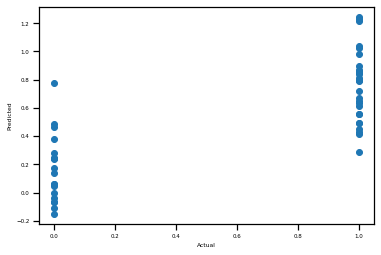

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

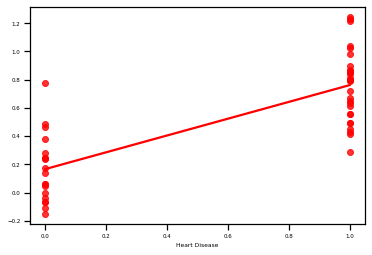

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [ ]:
pred_df

,Actual Value,Predicted Value,Difference
145,1,1.216687,-0.216687
43,0,0.238894,-0.238894
249,1,1.230575,-0.230575
41,0,-0.039345,0.039345
175,1,0.559360,0.440640
152,0,-0.112225,0.112225
252,1,0.557049,0.442951
159,1,0.787862,0.212138
235,1,1.036529,-0.036529
136,0,0.138878,-0.138878


**Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

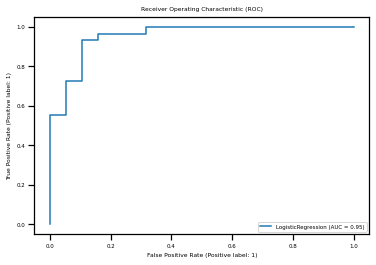

Logistic Regression score:  0.8958333333333334


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve

logit = LogisticRegression()
logit.fit(X_train, y_train)

predicted_logit = logit.predict(X_test)

LogisticRegressionScore = accuracy_score(predicted_logit, y_test)


plt.figure()
metrics.plot_roc_curve(logit, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()

print("Logistic Regression score: ", LogisticRegressionScore)

**Gaussian Naive Bayes**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

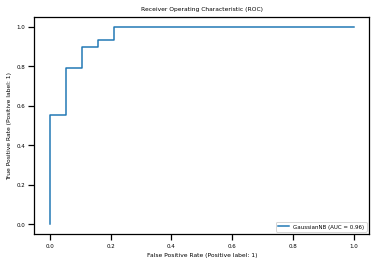

Gaussian Naive Bayes score:  0.875


In [ ]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)

gauss_pred = gauss.predict(X_test)

gauss_score = accuracy_score(gauss_pred, y_test)


plt.figure()
metrics.plot_roc_curve(gauss, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()


print("Gaussian Naive Bayes score: ", gauss_score)

**KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


KNC = KNeighborsClassifier(n_neighbors=2)
KNC.fit(X_train, y_train)

KNC_pred = KNC.predict(X_test)

KNC_accuracy = metrics.accuracy_score(y_test, KNC_pred)

print("KNeighbourClassifier score: ", KNC_accuracy)

KNeighbourClassifier score:  0.7291666666666666


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

rnd_clf_pred = rnd_clf.predict(X_test)

rnd_clf_accuracy = metrics.accuracy_score(y_test, rnd_clf_pred)
print("RandomForest score: ", rnd_clf_accuracy)

RandomForest score:  0.8541666666666666


**Bagging Decision Tree**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, oob_score=True,
    max_samples=100, bootstrap = True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

bag_clf_oob = bag_clf.oob_score_

bag_clf_pred = bag_clf.predict(X_test)
bag_clf_accuracy = metrics.accuracy_score(y_test, bag_clf_pred)
print("Bagging Decision Tree score: ", bag_clf_accuracy, "Out of the bag: ", bag_clf_oob)

Bagging Decision Tree score:  0.8541666666666666 Out of the bag:  0.7916666666666666


**Hard Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators = [('gauss',gauss), ('logit', logit), ('KN', KNC), ('bag', bag_clf), ("rnd_clf", rnd_clf)], 
    voting = 'soft'
)

voting_clf.fit(X_train, y_train)

voting_clf_pred = bag_clf.predict(X_test)
voting_clf_accuracy = metrics.accuracy_score(y_test, voting_clf_pred)
print("Voting Classifier score: ", voting_clf_accuracy)

Voting Classifier score:  0.8541666666666666


> # Model's accuracy

In [ ]:
data = {'Estimators':['Linear Regression', 
                      'Logistic Regression', 
                      'Gaussian Naive Bayes', 
                      'K-Nearest Neighbor', 
                      'Random Forest', 
                      'Bagging Decision Tree', 
                      "Hard coting classifier"],
        "Accuracy":[r2,
                    LogisticRegressionScore,
                    gauss_score,
                    KNC_accuracy,
                    rnd_clf_accuracy,
                    bag_clf_accuracy,
                    voting_clf_accuracy]
        }

data = pd.DataFrame(data)

data.sort_values('Accuracy', ascending='False')

,Estimators,Accuracy
0,Linear Regression,0.565830
3,K-Nearest Neighbor,0.729167
4,Random Forest,0.854167
5,Bagging Decision Tree,0.854167
6,Hard coting classifier,0.854167
2,Gaussian Naive Bayes,0.875000
1,Logistic Regression,0.895833


From the above result we can conclude that Logistic Regression has the hisgest accuracy for this particular dataset.